# Getting Started

In [1]:
#import required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/FINAL PROJECT/data_impr.csv')

/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
#Checking the no. of NaN vales
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
data.shape

(1017209, 9)

In [10]:
# Insights: We have over a million datapoints. Since we are dealing with a time-series prediction problem, 
# I have to sort the data based on the date

In [11]:
store = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/FINAL PROJECT/store.csv')

In [12]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [14]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [100]:
store.shape

(1115, 10)

In [15]:
#Checking the no. of NaN values
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [77]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [17]:
# Insights: We have a total of 1115 unique stores. And many columns here are null values. 
# I will need to take care of these

# Data Merging

In [18]:
# I will start by merging both Dataframes into one indexing them on the "Store" Id column

df=store.merge(data,on=["Store"],how="inner")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [19]:
# Number of rows and columns of the merged DataFrame
df.shape

(1017209, 18)

In [20]:
#Checking the no. of NaN values
df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

The columns - CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval have too many values as NaN (roughly 30% or above).
Whereas, the column CompetitionDistance has very few values missing, and these values can be substituted by the 'mode' of the very same column. 

# Handling NaN values

In [21]:
x = df['CompetitionDistance'].mean()
y = df['CompetitionOpenSinceMonth'].mean() 
z = df['CompetitionOpenSinceYear'].mean()

In [22]:
# Replacing the NaN values by the mode for columns CompetitionDistance,CompetitionOpenSinceMonth,
# and CompetitionSinceYear 

df['CompetitionDistance'] = df['CompetitionDistance'].fillna(x)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(y)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(z)

In [23]:
# The 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' 
# need to be of integer type instead of float

df.CompetitionOpenSinceMonth=df.CompetitionOpenSinceMonth.astype(int)
df.CompetitionOpenSinceYear=df.CompetitionOpenSinceYear.astype(int)


In [24]:
# Replacing NaN values by 1 for the remaining columns

df['StateHoliday'] = df['StateHoliday'].fillna(1)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].replace(np.nan, 1)
df['Promo2SinceYear'] = df['Promo2SinceYear'].replace(np.nan, 1)
df['PromoInterval'] = df['PromoInterval'].replace(np.nan, 1)

# Handling Outliers

/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

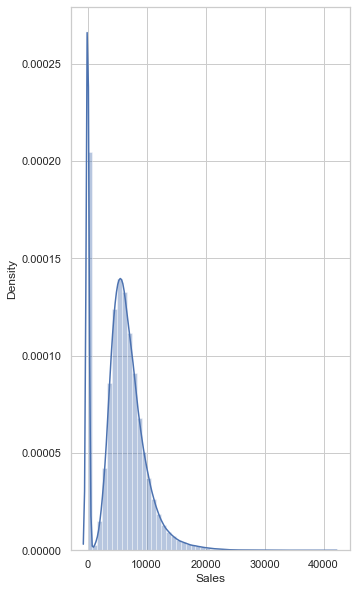

In [25]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Sales"])

In [26]:
df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [27]:
# From the above, we can see that sales are very scarce after 22,000

/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customers', ylabel='Density'>

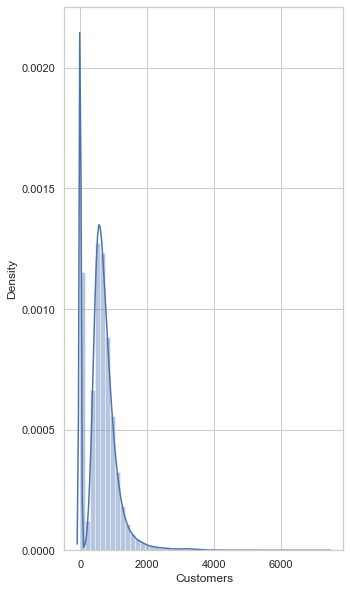

In [28]:
#Find the range of the data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Customers"])

In [29]:
# From the above, we see that the number of customers drops considerably after 4000

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

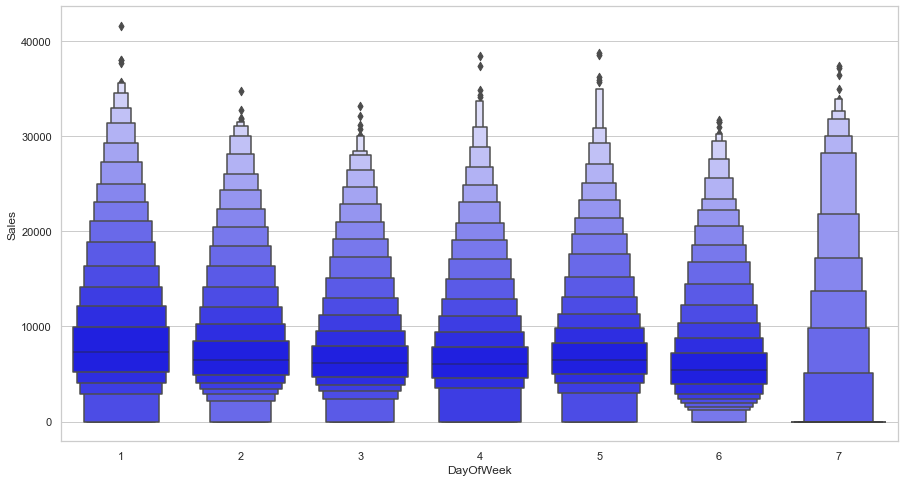

In [30]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.boxenplot(data=df,scale="linear",x="DayOfWeek",y="Sales",color="blue")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

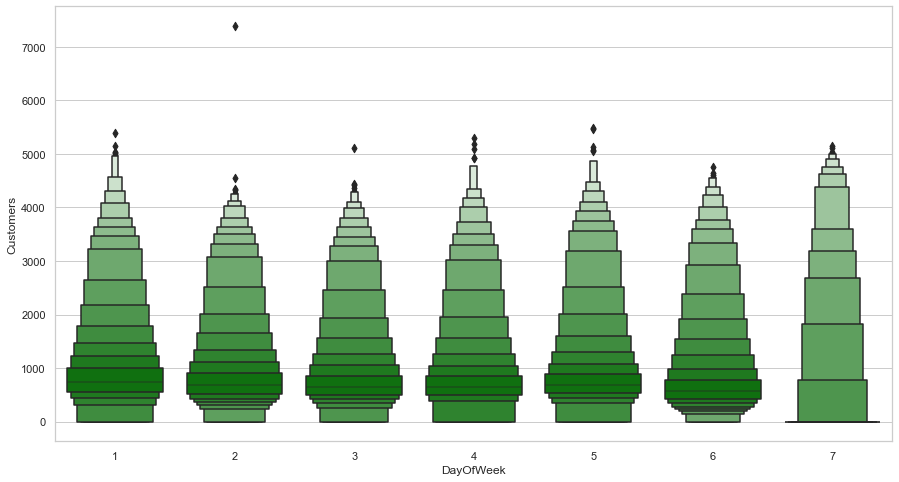

In [31]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=df, scale="linear",color="green")

In [32]:
# The data contains a considerable number of outliers, but these might have been caused to the peak of 
# customers during holidays, or due to promotions
# As per the above graphs, I will limit the number of customers to 4000 and Sales to 22,000

In [33]:
df["Sales"]=df["Sales"].apply(lambda x: 22000 if x>22000 else x)
df["Customers"]=df["Customers"].apply(lambda y: 4000 if y>4000 else y)
print(max(df["Sales"]))
print(max(df["Customers"]))

22000
4000


# Dealing with the Date issues

In [34]:
# Extracting the from the Date variable the 'Year', 'Month', 'Day' columns and converting them to integer

df['Year']  = df['Date'].str[0:4]
df['Month'] = df['Date'].str[5:7]
df['Day']   = df['Date'].str[8:]

df.Year=df.Year.astype(int)
df.Month=df.Month.astype(int)
df.Day=df.Day.astype(int)

In [35]:
# Creating a new column 'Season' 

df['Season'] =  np.where(df['Month'].isin([3,4]),"Spring",
                np.where(df['Month'].isin([5,6,7,8]), "Summer",
                np.where(df['Month'].isin ([9,10,11]),"Fall",
                np.where(df['Month'].isin ([12,1,2]),"Winter","None"))))

In [36]:
# Creating a new column 'Week' of the year and converting it to integer

df['Date']=pd.to_datetime(df[['Year','Month','Day']])
df['Week']=df['Date'].dt.weekofyear
df.Week=df.Week.astype(int)

<ipython-input-36-b7442787cb90>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week']=df['Date'].dt.weekofyear


In [37]:
# I added a new item to know the number of holidays per week

In [38]:
Holiday_Year_Month_Week_df=pd.DataFrame({"Holiday per week":df["SchoolHoliday"],"Week":df["Week"],"Month":df["Month"],"Year":df["Year"],"Date":df["Date"]})
Holiday_Year_Month_Week_df=Holiday_Year_Month_Week_df.drop_duplicates(subset=['Date'])
Holiday_Year_Month_Week_df=Holiday_Year_Month_Week_df.groupby(["Year","Month","Week"]).sum()
Holiday_Year_Month_Week_df

Holiday per week
Year Month Week                  
2013 1     1                    6
           2                    5
           3                    0
           4                    0
           5                    0
...                           ...
2015 7     27                   0
           28                   0
           29                   0
           30                   0
           31                   5

[160 rows x 1 columns]

In [39]:
df=df.merge(Holiday_Year_Month_Week_df, on=["Year","Month","Week"],how="inner")

In [40]:
# I will calculate the average number of Customers/ Month and the average number of Customers/ Week 
# and put them in variables

In [41]:
customer_time_df=pd.DataFrame({"Avg CustomersPerMonth":df["Customers"],"Month":df["Month"]})
AvgCustomerperMonth=customer_time_df.groupby("Month").mean()
AvgCustomerperMonth

,Avg CustomersPerMonth
Month,
1,601.583872
2,626.681807
3,629.334346
4,630.489567
5,601.768176
6,624.660588
7,656.505448
8,642.367427
9,634.382033


In [42]:
customer_time_df=pd.DataFrame({"Avg CustomersPerWeek":df["Customers"],"Week":df["Week"],"Year":df["Year"],"Month":df["Month"]})
AvgCustomerperWeek=customer_time_df.groupby(["Year","Month","Week"]).mean()
AvgCustomerperWeek

Avg CustomersPerWeek
Year Month Week                      
2013 1     1               465.032441
           2               669.607303
           3               538.852402
           4               631.062780
           5               652.218610
...                               ...
2015 7     27              600.287713
           28              599.478539
           29              672.095836
           30              573.446765
           31              807.577578

[160 rows x 1 columns]

In [43]:
df=df.merge(AvgCustomerperMonth,on="Month",how="inner")
df=df.merge(AvgCustomerperWeek,on=["Year","Month","Week"],how="inner")

In [44]:
# I need to have the number of promotions/ Week in a new variable

In [45]:
promo_time_df=pd.DataFrame({"PromoCountPerWeek":df["Promo"],"Year":df["Year"],"Month":df["Month"],"Week":df["Week"],"Date":df["Date"]})
promo_time_df=promo_time_df.drop_duplicates(subset=['Date'])
promo_time_df=promo_time_df.groupby(["Year","Month","Week"]).sum()
promo_time_df

PromoCountPerWeek
Year Month Week                   
2013 1     1                     0
           2                     5
           3                     0
           4                     5
           5                     0
...                            ...
2015 7     27                    3
           28                    0
           29                    5
           30                    0
           31                    5

[160 rows x 1 columns]

In [46]:
df=df.merge(promo_time_df,on=["Year","Month","Week"], how="inner")

In [47]:
# I will combine the 2 variables 'CompetitionSinceMonth' and 'CompetitionSinceYear' into 'CompetitionSince'

In [48]:
df=df.rename(columns={'CompetitionOpenSinceYear': 'year','CompetitionOpenSinceMonth':'month'})
df['CompetitionOpenSince'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df=df.rename(columns={ 'year':'CompetitionOpenSinceYear','month':'CompetitionOpenSinceMonth'})

In [49]:
df.dtypes

Store                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
Season                               object
Week                            

In [50]:
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

## Finding location of stores

In [51]:
#using public state holidays data from https://www.timeanddate.com/holidays/germany/2013
# Taking into consideration that from public holidays we get values for Easter and Christmas holidays too

holid=df.loc[df.StateHoliday=='a']
bydate=df.groupby('Date')['Store'].count()

#number of stores celebrating holidays
bydate.head()

Date
2013-01-01    1114
2013-01-02    1115
2013-01-03    1115
2013-01-04    1115
2013-01-05    1115
Name: Store, dtype: int64

In [52]:
#Figuring out store locations based on state holidays

SN = holid.loc[holid.Date == '2013-11-20','Store'].values
print('{} stores located in Saxony.'.format(SN.shape[0]))

BW_BY_ST = holid.loc[holid.Date == '2013-01-06','Store'].values
print('{} stores located in BW, BY, ST.'.format(BW_BY_ST.shape[0]))

BW_BY_HE_NW_RP_SL = holid.loc[holid.Date == '2013-05-30','Store'].values
print('{} stores located in BW, BY, HE, NW, RP, SL.'.format(BW_BY_HE_NW_RP_SL.shape[0]))

BY_SL = holid.loc[holid.Date =='2013-08-15','Store'].values
print('{} stores located in BY,SL.'.format(BY_SL.shape[0]))

BB_MV_SN_ST_TH = holid.loc[holid.Date =='2013-10-31','Store'].values
print('{} stores located in BB, MV, SN, ST, TH.'.format(BB_MV_SN_ST_TH.shape[0]))

BW_BY_NW_RP_SL = holid.loc[holid.Date =='2013-11-01','Store'].values
print('{} stores located in BW, BY, NW, RP, SL.'.format(BW_BY_NW_RP_SL.shape[0]))

BW_BY = np.intersect1d(BW_BY_ST, BW_BY_HE_NW_RP_SL)
print('{} stores located in BW, BY.'.format(BW_BY.shape[0]))

75 stores located in Saxony.
309 stores located in BW, BY, ST.
766 stores located in BW, BY, HE, NW, RP, SL.
180 stores located in BY,SL.
167 stores located in BB, MV, SN, ST, TH.
579 stores located in BW, BY, NW, RP, SL.
253 stores located in BW, BY.


In [53]:
ST = np.setxor1d(BW_BY_ST, BW_BY)
print('{} stores located in ST.'.format(ST.shape[0]))

BY = np.intersect1d(BW_BY, BY_SL)
print('{} stores located in BY.'.format(BY.shape[0]))

SL = np.setxor1d(BY, BY_SL)
print('{} stores located in SL.'.format(SL.shape[0]))

BW = np.setxor1d(BW_BY, BY)
print('{} stores located in BW.'.format(BW.shape[0]))

HE = np.setxor1d(BW_BY_HE_NW_RP_SL,BW_BY_NW_RP_SL)
print('{} stores located in HE.'.format(HE.shape[0]))

BB_MV_TH = np.setxor1d(np.setxor1d(BB_MV_SN_ST_TH,SN),ST)
print('{} stores located in BB, MV, TH.'.format(BB_MV_TH.shape[0]))

NW_RP = np.setxor1d(BW_BY_NW_RP_SL,BW_BY) # SL has 0 stores
print('{} stores located in NW, RP.'.format(NW_RP.shape[0]))

allstores = np.unique(df.Store.values)
BE_HB_HH_NI_SH = np.setxor1d(np.setxor1d(allstores,BW_BY_HE_NW_RP_SL),BB_MV_SN_ST_TH)

print('{} stores located in BE, HB, HH, NI, SH.'.format(BE_HB_HH_NI_SH.shape[0]))

56 stores located in ST.
180 stores located in BY.
0 stores located in SL.
73 stores located in BW.
187 stores located in HE.
36 stores located in BB, MV, TH.
326 stores located in NW, RP.
332 stores located in BE, HB, HH, NI, SH.


In [54]:
#using public school holidays data from http://www.holidays-info.com/School-Holidays-Germany/2015/school-holidays_2015.html.

#furthur division based on school holidays

df.loc[df.Store.isin(NW_RP)].groupby('Date')['SchoolHoliday'].sum().value_counts()
RP = df.loc[df.Date=='2015-03-26'].loc[df.Store.isin(NW_RP)].loc[df.SchoolHoliday==1,'Store'].values
NW = np.setxor1d(NW_RP,RP)
print('{} stores located in RP.'.format(RP.shape[0]))
print('{} stores located in NW.'.format(NW.shape[0]))

df.loc[df.Store.isin(BB_MV_TH)].groupby('Date')['SchoolHoliday'].sum().value_counts()
TH = BB_MV_TH
print('{} stores located in TH.'.format(TH.shape[0]))

HH = df.loc[df.Date=='2015-03-02'].loc[df.Store.isin(BE_HB_HH_NI_SH)].loc[df.SchoolHoliday==1,'Store'].values
print('{} stores located in HH.'.format(HH.shape[0]))

BE_HB_NI_SH = np.setxor1d(BE_HB_HH_NI_SH,HH)
SH = df.loc[df.Date=='2015-04-17'].loc[df.Store.isin(BE_HB_NI_SH)].loc[df.SchoolHoliday==1,'Store'].values
print('{} stores located in SH.'.format(SH.shape[0]))

BE_HB_NI = np.setxor1d(BE_HB_NI_SH,SH)
BE = df.loc[df.Date=='2015-03-25'].loc[df.Store.isin(BE_HB_NI)].loc[df.SchoolHoliday==0,'Store'].values
print('{} stores located in BE.'.format(BE.shape[0]))

HB_NI = np.setxor1d(BE_HB_NI,BE)

40 stores located in RP.
286 stores located in NW.
36 stores located in TH.
28 stores located in HH.
115 stores located in SH.
167 stores located in BE.


In [55]:
states = pd.Series('',index = allstores,name='State')
states.loc[BW] = 'BW'
states.loc[BY] = 'BY'
states.loc[BE] = 'BE'
states.loc[HB_NI] = 'HB,NI'
states.loc[HH] = 'HH'
states.loc[HE] = 'HE'
states.loc[NW] = 'NW'
states.loc[RP] = 'RP'
states.loc[SN] = 'SN'
states.loc[ST] = 'ST'
states.loc[SH] = 'SH'
states.loc[TH] = 'TH'
states[states!=''].value_counts().sum()


states.to_csv(r'/Users/nadimsaad/Desktop/IRONHACK/FINAL PROJECT/location.csv', header=True, index_label='Store')

# EDA

## Dealing with the Promotions

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

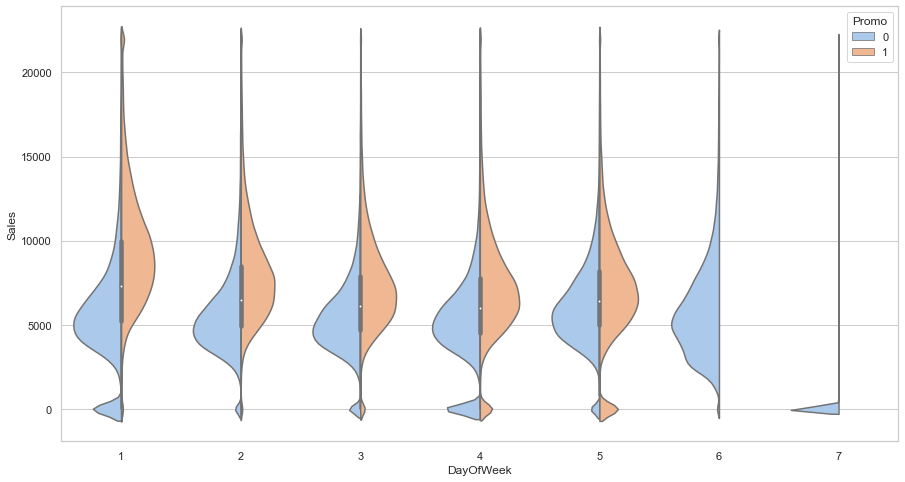

In [56]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=True, data=df)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

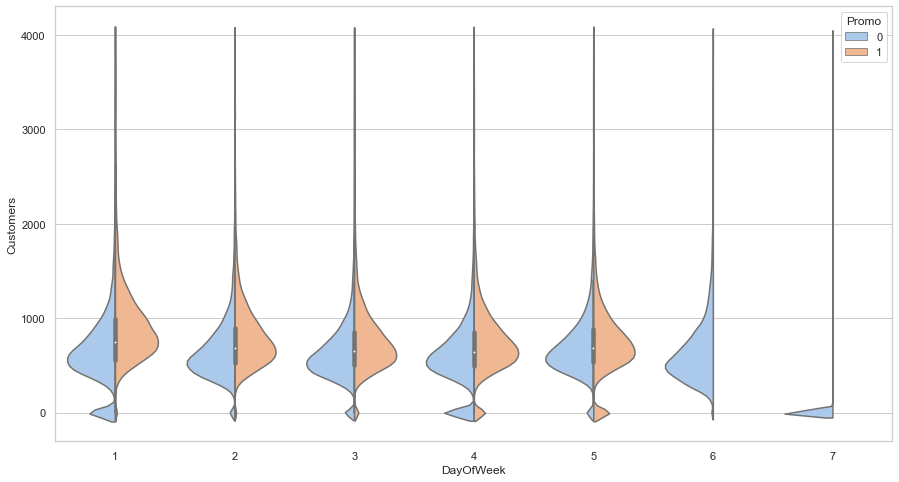

In [57]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Customers",hue="Promo",split=True, data=df)

In [58]:
# Days with promotions generate more Sales. From the above, we see that there are no promotions on 
# Saturdays and Sundays. Even thought there are no promos on Saturdays, we notice that the number of 
# customers is not impacted by that

## Dealing with the Competition distance

<AxesSubplot:xlabel='CompetitionDistanceLOG', ylabel='Sales'>

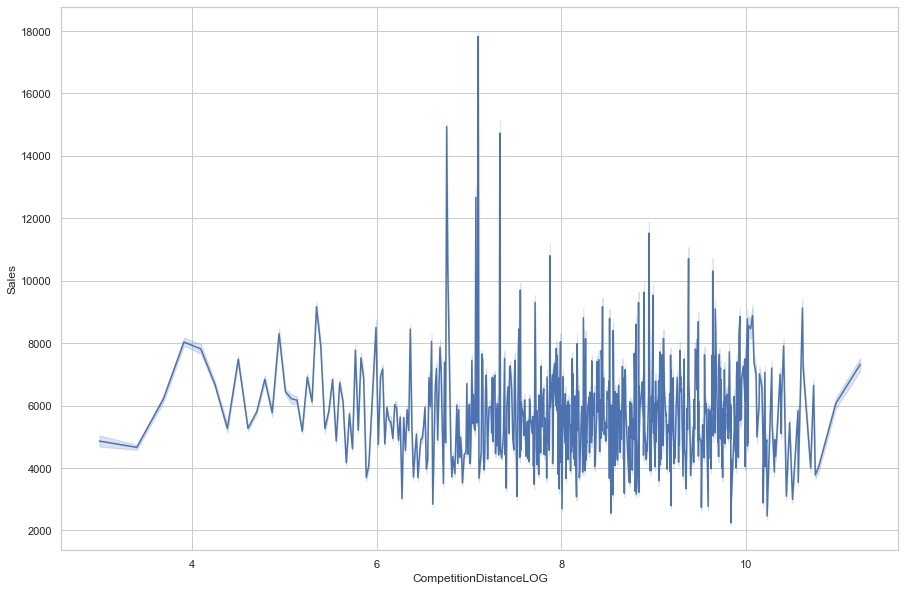

In [59]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
df["CompetitionDistanceLOG"]=np.log(df["CompetitionDistance"])
sns.lineplot(x="CompetitionDistanceLOG", y="Sales", data=df)

In [60]:
# From the above, we see that the distance between Rossmann stores and their competitors has no impact 
# on sales

## Dealing with School Holidays 

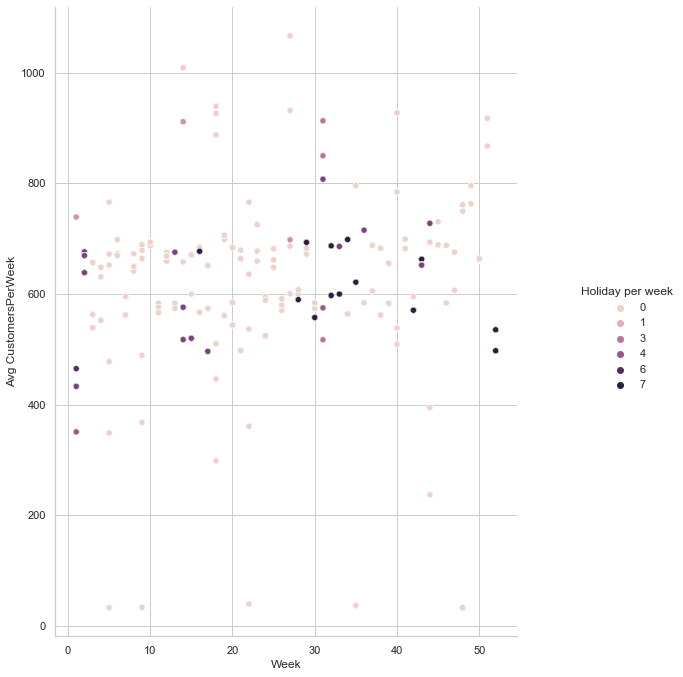

In [61]:
sns.set(style="whitegrid")
g=sns.relplot(y="Avg CustomersPerWeek", x="Week", hue="Holiday per week", data=df)
g.fig.set_size_inches(10,10)

In [62]:
# There is no big difference in the number of customers even if there were 4 School Holidays on a 
# specific week

## Impact of Sales Promotions on School Holidays

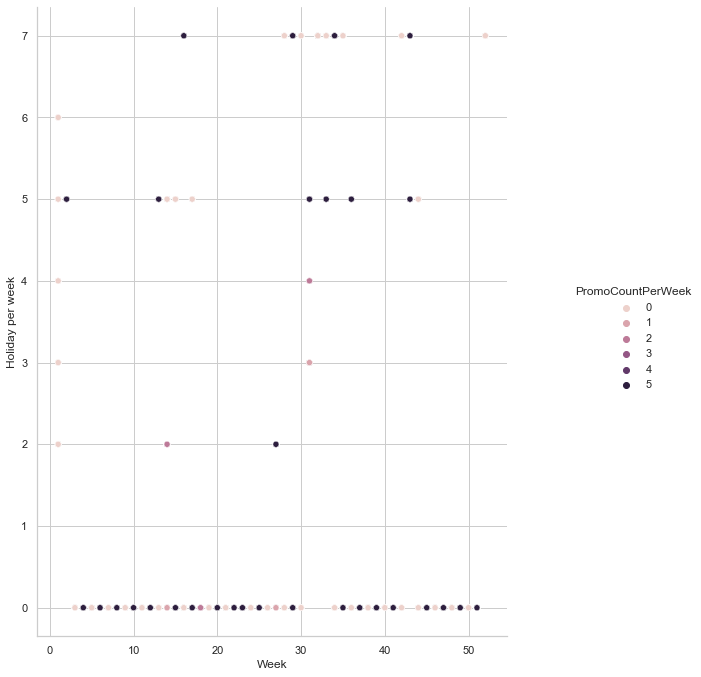

In [63]:
sns.set(style="whitegrid")
g=sns.relplot(y="Holiday per week", x="Week", hue="PromoCountPerWeek", data=df)
g.fig.set_size_inches(10,10)

# Dealing with the categorical variables

In [64]:
# Columns 'StoreType', 'Assortment', and 'Season' are of object type, I will convert them to int values

In [65]:
numerical_data_col=["Store","Competition Distance","Promo2","DayOfWeek","Sales","Customers","Open","SchoolHoliday","Year","Month","Day","Week"]
categorical_data_col=["StoreType","Assortment","Season"]

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Object_list = df.select_dtypes(include = "object").columns
le = LabelEncoder()
for col in df[Object_list]:
    df[col] = le.fit_transform(df[col].astype(str))

In [67]:
df.dtypes

Store                                 int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
Season                                int64
Week                            

In [68]:
#for i in categorical_data_col:
 #   p=0
  #  for j in df[i].unique():
   #     df[i]=np.where(df[i]==j,p,df[i])
    #    p=p+1

   # df[i]=df[i].astype(int)

In [69]:
# 'StateHoliday' column has zeros. I will convert to integer 

# df["StateHoliday"].unique()

In [70]:
# It doesn't seem like the Holidays had any effect on promo and Customers

In [71]:
#df["StateHoliday"]=np.where(df["StateHoliday"] == '0' ,0,1)
#df["StateHoliday"]=df["StateHoliday"].astype(int)

# Feature Selection 

In [72]:
# Doing the Correlation between the data columns

#plt.figure(figsize=(15,15))
#sns.heatmap((df.corr()))

<AxesSubplot:>

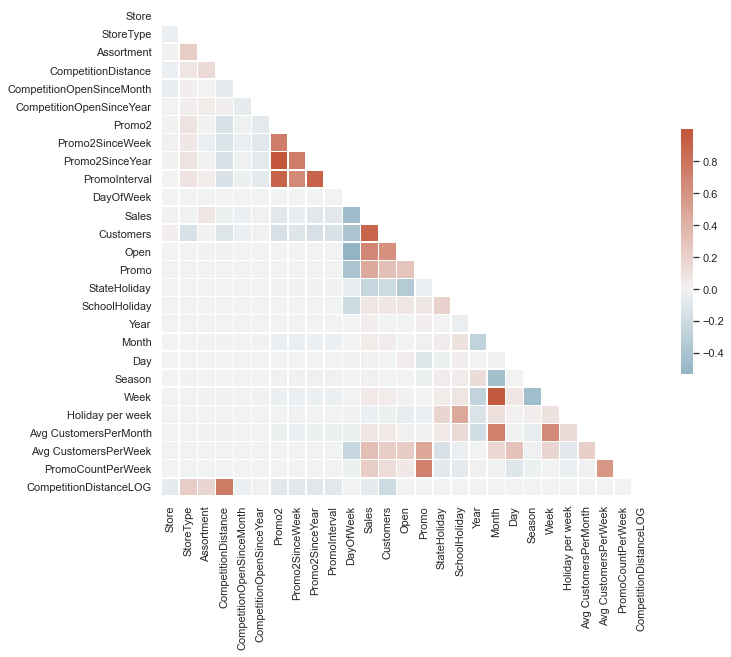

In [73]:
# Compute the correlation matrix

corr=df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
# The heatmap shows all our hypothesis were true, there is very little correlation between School Holiday,
# Customers and Promo, but there is a strong correlation between Promo and Sales

# Final Check

In [75]:
df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Month,Day,Season,Week,Holiday per week,Avg CustomersPerMonth,Avg CustomersPerWeek,PromoCountPerWeek,CompetitionOpenSince,CompetitionDistanceLOG
0,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,31,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
1,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,30,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
2,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,29,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
3,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,28,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
4,1,2,0,1270.0,9,2008,0,1.0,1.0,0,...,7,27,2,31,5,656.505448,807.577578,5,2008-09-01,7.146772
5,2,0,0,570.0,11,2007,1,13.0,2010.0,2,...,7,31,2,31,5,656.505448,807.577578,5,2007-11-01,6.345636
6,2,0,0,570.0,11,2007,1,13.0,2010.0,2,...,7,30,2,31,5,656.505448,807.577578,5,2007-11-01,6.345636
7,2,0,0,570.0,11,2007,1,13.0,2010.0,2,...,7,29,2,31,5,656.505448,807.577578,5,2007-11-01,6.345636
8,2,0,0,570.0,11,2007,1,13.0,2010.0,2,...,7,28,2,31,5,656.505448,807.577578,5,2007-11-01,6.345636
9,2,0,0,570.0,11,2007,1,13.0,2010.0,2,...,7,27,2,31,5,656.505448,807.577578,5,2007-11-01,6.345636


In [76]:
df.to_csv(r'/Users/nadimsaad/Desktop/IRONHACK/FINAL PROJECT/RossmannSales.csv') 